In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
import pandas as pd
data = pd.read_csv(r"C:\Users\sithara\Downloads\abalone.csv")

## Perform Below Visualizations.
##uni-variate
##Bi - Variate Analysis
##Multi - Variate Analysis



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


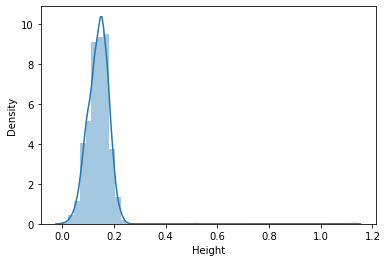

In [ ]:
#univariate
import seaborn as sns
sns.distplot(data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


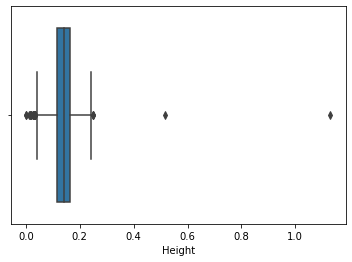

In [ ]:
sns.boxplot(data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


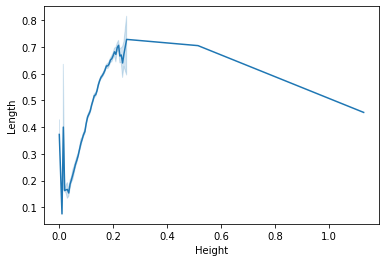

In [ ]:
#bivariate analysis
sns.lineplot(data['Height'], data['Length'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


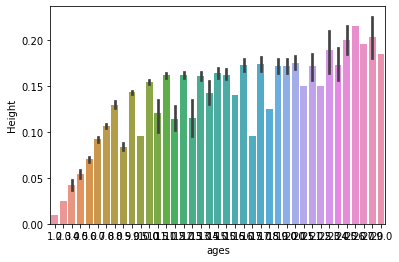

In [ ]:
sns.barplot(data['ages'], data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


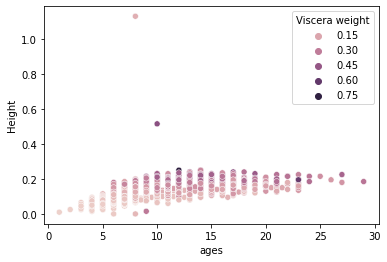

In [ ]:
#Multi - Variate Analysis
sns.scatterplot(data['ages'], data['Height'], hue = data['Viscera weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


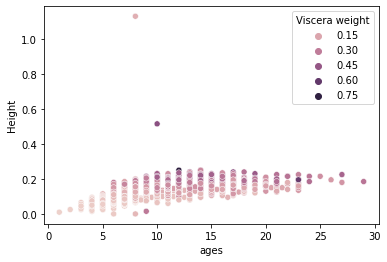

In [ ]:
sns.scatterplot(data['ages'], data['Height'], hue = data['Viscera weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


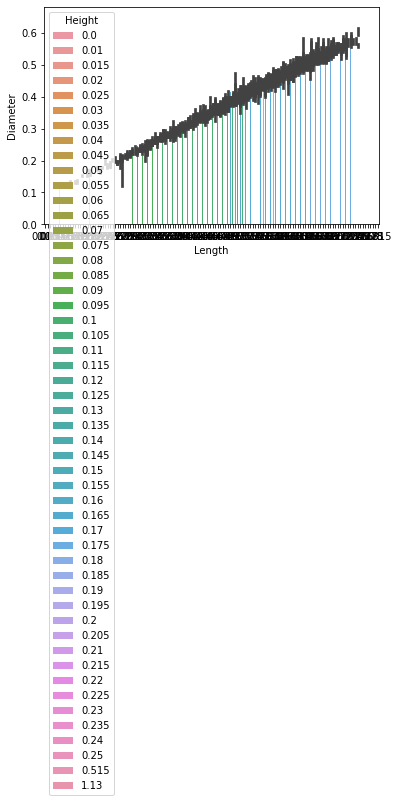

In [ ]:
sns.barplot(data['Length'],data['Diameter'], hue = data['Height'])

##descriptive analysis

In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,ages
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,9.941944
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.228809
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e460b56d0>,
      dtype=object)

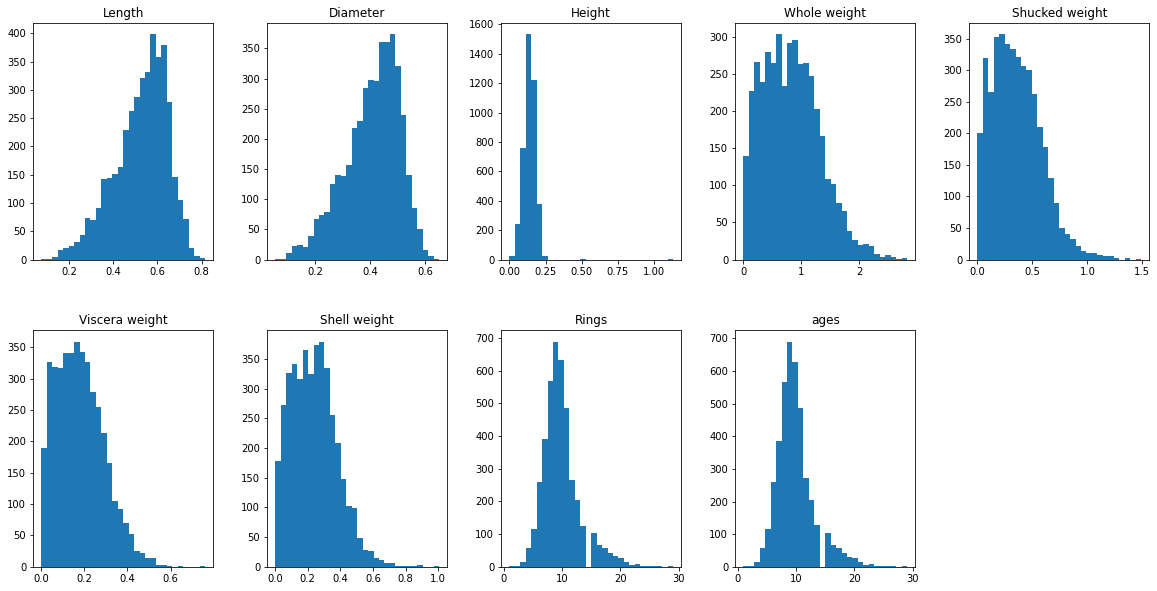

In [ ]:
data.hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30)

## Handle the Missing values.

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0
ages,0,0.0


##outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


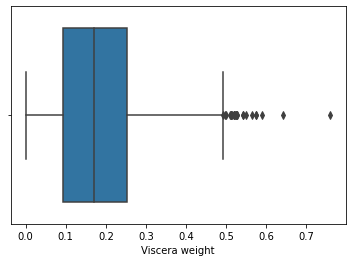

In [ ]:
sns.boxplot(data['Viscera weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


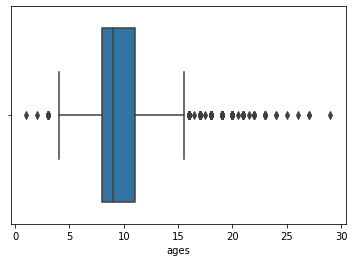

In [ ]:
## handling outliers
import numpy as np
data['ages'] = np.where(data['ages']>45, 31, data['ages'])
sns.boxplot(data['ages'])

In [ ]:
q = data.quantile([0.75,0.25])

In [ ]:
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,ages
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0,11.0
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0,8.0


In [ ]:
iqr = q.iloc[0] - q.iloc[1]

In [ ]:
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
ages              3.0000
dtype: float64

In [ ]:
u = q.iloc[0] + (1.5*iqr)

In [ ]:
u

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
ages              15.50000
dtype: float64

##Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Diameter'] = le.fit_transform(data['Diameter'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,ages
0,M,0.455,56,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,36,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,67,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,56,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,34,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,ages
0,M,0.455,56,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,36,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,67,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,56,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,34,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


##Split the data into dependent and independent variables

In [ ]:
x = data.iloc[:, 0:5]
x

,Sex,Length,Diameter,Height,Whole weight
0,M,0.455,56,0.095,715
1,M,0.350,36,0.090,285
2,F,0.530,67,0.135,962
3,M,0.440,56,0.125,718
4,I,0.330,34,0.080,253
...,...,...,...,...,...
4172,F,0.565,73,0.165,1289
4173,M,0.590,71,0.135,1411
4174,M,0.600,78,0.205,1727
4175,F,0.625,80,0.150,1610


In [ ]:
data.iloc[:, -1].values

array([16.5,  8.5, 10.5, ...,  9. , 10. , 12. ])

##Scale the independent variables

In [ ]:
from sklearn import preprocessing

 
# separate the independent and dependent variables
X_data = data.ages

 
# standardization of dependent variables
standard = preprocessing.scale(X_data)
print(standard)


[ 2.0313499  -0.4466404   0.17285718 ... -0.291766    0.01798278
  0.63748036]


In [ ]:
standard

array([ 2.0313499 , -0.4466404 ,  0.17285718, ..., -0.291766  ,
        0.01798278,  0.63748036])

##train the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)



In [ ]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
678,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.2650,23
3009,I,0.255,0.185,0.065,0.0740,0.0305,0.0165,0.0200,4
1906,I,0.575,0.450,0.135,0.8245,0.3375,0.2115,0.2390,11
768,F,0.550,0.430,0.155,0.7850,0.2890,0.2270,0.2330,11
2781,M,0.595,0.475,0.140,1.0305,0.4925,0.2170,0.2780,10
...,...,...,...,...,...,...,...,...,...
1033,M,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
1653,M,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
2607,F,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   int64  
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   int64  
 5   Shucked weight  4177 non-null   int64  
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   ages            4177 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 326.5+ KB


##modal building


In [ ]:
from sklearn.preprocessing import OneHotEncoder
transformed_sex_feature = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1,1)).toarray()
data_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
data = pd.concat([data, data_sex_encoded], axis=1)

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,ages,Sex_0,Sex_1,Sex_2
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [ ]:
Xtrain = data.drop(['Rings','Height','Sex'], axis = 1)
Ytrain = data['Rings']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
result_acc

0.5199419869470631

##train the model

In [ ]:
from random import randint
  
# the limit within which random numbers are generated
TRAIN_SET_LIMIT = 1000
  
# to create exactly 100 data items
TRAIN_SET_COUNT = 100
  
# list that contains input and corresponding output
TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
  
# loop to create 100 data  items with three columns each
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
  
# creating the output for each data item
    op = a + (2 * b) + (3 * c)
    TRAIN_INPUT.append([a, b, c])
  
# adding each output to output list
    TRAIN_OUTPUT.append(op)

In [ ]:
from sklearn.linear_model import LinearRegression
  
# Initialize the linear regression model
predictor = LinearRegression(n_jobs =-1)
  
# Fill the Model with the Data
predictor.fit(X = TRAIN_INPUT, y = TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)

##test the model

In [ ]:
X_TEST = [[ 10, 20, 30 ]]
  
# Predict the result of X_TEST which holds testing data
outcome = predictor.predict(X = X_TEST)
  
# Predict the coefficients
coefficients = predictor.coef_
  
# Print the result obtained for the test data
print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

Outcome : [140.]
Coefficients : [1. 2. 3.]
